# **DBSCAN Clustering in Unsupervised Learning**  

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an **unsupervised learning** clustering algorithm that groups together data points that are close to each other while marking outliers as noise. Unlike **K-Means** and **Hierarchical Clustering**, DBSCAN does not require specifying the number of clusters in advance and can find arbitrarily shaped clusters.

---

## **Working of DBSCAN**
DBSCAN works by categorizing points into three types:
1. **Core Points**: Points that have at least **MinPts** (minimum points) within a given **radius \( \varepsilon \)**.
2. **Border Points**: Points that are within \( \varepsilon \) of a core point but have fewer than **MinPts** neighbors.
3. **Noise Points**: Points that are neither core nor border points.

The algorithm follows these steps:
1. Pick an unvisited point.
2. If it is a **core point**, form a cluster by including all density-reachable points.
3. If it is a **border point**, assign it to a nearby core point’s cluster.
4. If it is a **noise point**, label it as an outlier.
5. Repeat until all points are visited.

---

## **Mathematical Intuition Behind DBSCAN**
DBSCAN relies on **density-based reachability** and **connectivity**.

### **1. Distance Metric**
DBSCAN uses **Euclidean Distance** to measure the closeness of points:
\[
  d(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2}
\]
Other distance metrics like Manhattan Distance can also be used.

### **2. Density Reachability**
A point \( p \) is **directly density-reachable** from \( q \) if:
- \( d(p, q) \leq \varepsilon \) (within radius)
- \( q \) is a core point (has at least **MinPts** neighbors within \( \varepsilon \))

A point \( p \) is **density-reachable** from \( q \) if there exists a chain of core points \( q_1, q_2, ..., q_n \) such that each point is directly density-reachable from the next.

### **3. Cluster Formation**
Clusters are formed by connecting **density-reachable** points. Noise points are not connected to any cluster.

---

## **Choosing DBSCAN Parameters (\( \varepsilon \) and MinPts)**
- **\( \varepsilon \) (Epsilon radius)**: A small value may result in too many noise points; a large value may merge separate clusters.
- **MinPts (Minimum Points)**: Usually chosen as **2 × (number of dimensions)**.

A **k-distance plot** can help select \( \varepsilon \) by looking for the “elbow point” in the graph.

---

## **Advantages of DBSCAN**
✅ **No need to predefine K** (unlike K-Means).  
✅ **Finds arbitrarily shaped clusters**.  
✅ **Robust to outliers** by marking them as noise.  
✅ **Works well with varying densities**.  

## **Limitations of DBSCAN**
❌ **Struggles with varying densities**: Cannot separate clusters with different densities.  
❌ **High-dimensional data**: Distance calculations become inefficient in high dimensions.  
❌ **Parameter sensitivity**: Choosing the right \( \varepsilon \) and **MinPts** is crucial.  

---

### **Comparison: DBSCAN vs. K-Means vs. Hierarchical Clustering**
| Feature                | K-Means Clustering       | Hierarchical Clustering | DBSCAN |
|------------------------|------------------------|-------------------------|--------|
| **Input Required**      | K (Number of clusters) | No input required | Epsilon (\( \varepsilon \)), MinPts |
| **Scalability**        | Works for large datasets | Slow for large datasets | Works well for large datasets |
| **Cluster Shape**      | Assumes spherical clusters | Works with different shapes | Arbitrary shapes |
| **Handling Noise**     | Poor | Poor | Good (identifies outliers) |
| **Performance in High Dimensions** | Good | Poor | Poor |
| **Result Interpretation** | Less interpretable | Dendrogram-based | Density-based |

Would you like a Python implementation of DBSCAN? 🚀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons


In [3]:
X,y=make_moons(n_samples=250,noise=0.05)

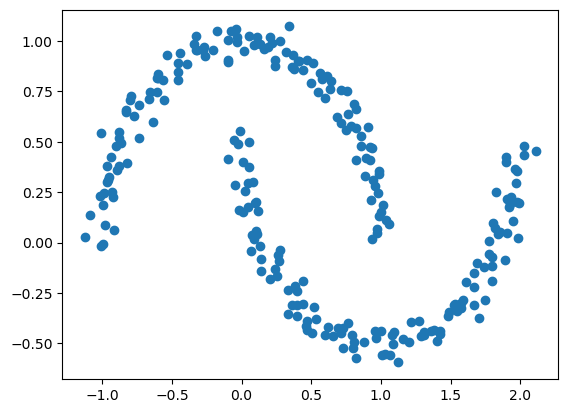

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
## feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [9]:
X_scaled

array([[ 6.24621944e-01, -2.82570655e-01],
       [-4.77277016e-01,  1.47383676e+00],
       [ 5.66065397e-01,  2.07557813e-01],
       [-1.10087938e+00,  1.11474233e+00],
       [-1.26958815e+00,  1.14074283e+00],
       [ 2.69813263e-01, -1.56711458e+00],
       [ 1.85603529e-01, -1.44179304e+00],
       [-1.91885487e-01, -9.86145844e-01],
       [ 1.51369693e+00, -3.17077786e-01],
       [ 5.36057622e-01, -1.45964705e+00],
       [ 2.96657040e-01,  1.00450100e+00],
       [ 1.26549588e+00, -1.08153137e+00],
       [ 8.13350029e-01, -1.50454041e+00],
       [ 1.70958501e+00, -9.71156782e-02],
       [ 5.31973362e-01, -1.39115735e+00],
       [ 1.29188312e+00, -9.04530087e-01],
       [ 1.70694702e+00,  8.78232174e-02],
       [-1.58850842e-01,  1.24515244e+00],
       [ 4.37230413e-01, -1.50791911e+00],
       [-1.49145663e+00,  9.57013500e-01],
       [ 9.40734778e-01, -1.40771151e+00],
       [ 3.06627544e-01, -1.30870523e+00],
       [-1.34378311e+00,  9.28199877e-01],
       [-4.

In [10]:
dbscan=DBSCAN(eps=0.3)

In [11]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.3)

In [12]:
dbscan.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

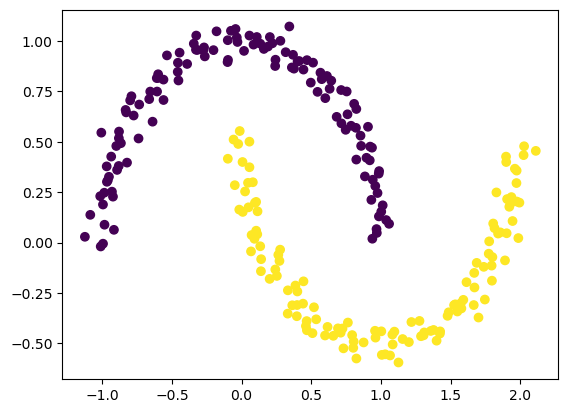

In [14]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)